In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY', '8466c9c4385649c2ad209aea6b71b0fa')

In [5]:
def search_images_bing(key, term, max_images: int = 150, **kwargs):    
     params = {'q':term, 'count':max_images}
     headers = {"Ocp-Apim-Subscription-Key":key}
     search_url = "https://api.bing.microsoft.com/v7.0/images/search"
     response = requests.get(search_url, headers=headers, params=params)
     response.raise_for_status()
     search_results = response.json()    
     return L(search_results['value'])

In [13]:
results = search_images_bing(key, 'sangoku')
ims = results.attrgot('contentUrl')
len(ims)

150

In [14]:
dest = 'images/goku.jpg'
download_url(ims[0], dest)

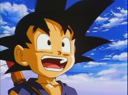

In [15]:
im = Image.open(dest)
im.to_thumb(128,128)